In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import

In [2]:
# Load the data
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           955339 non-null  int64  
 1   Date Rptd       955339 non-null  object 
 2   DATE OCC        955339 non-null  object 
 3   TIME OCC        955339 non-null  int64  
 4   AREA            955339 non-null  int64  
 5   AREA NAME       955339 non-null  object 
 6   Rpt Dist No     955339 non-null  int64  
 7   Part 1-2        955339 non-null  int64  
 8   Crm Cd          955339 non-null  int64  
 9   Crm Cd Desc     955339 non-null  object 
 10  Mocodes         818664 non-null  object 
 11  Vict Age        955339 non-null  int64  
 12  Vict Sex        825294 non-null  object 
 13  Vict Descent    825284 non-null  object 
 14  Premis Cd       955327 non-null  float64
 15  Premis Desc     954770 non-null  object 
 16  Weapon Used Cd  325019 non-null  float64
 17  Weapon Des

In [6]:
#lets check to see the pattern of the gender of the victims
data["Vict Sex"].value_counts()

Vict Sex
M    389037
F    346781
X     89366
H       109
-         1
Name: count, dtype: int64

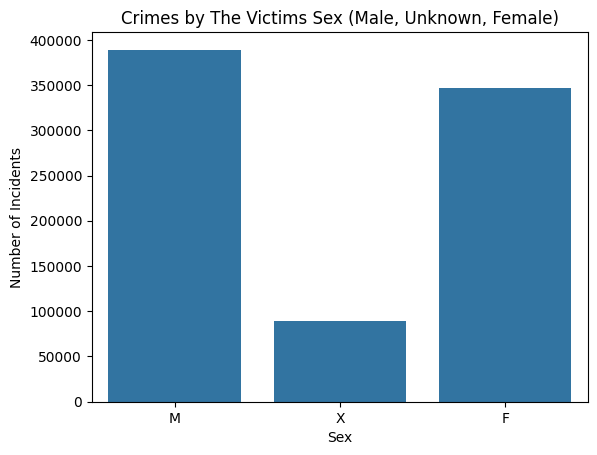

In [7]:
#filter data to exlude out of category sex values
victim_sex = data[data["Vict Sex"].isin(["M", "F", "X"])]

#plot the counts of crimes for each victim sex
sns.countplot(victim_sex, x= "Vict Sex")
plt.title('Crimes by The Victims Sex (Male, Unknown, Female)')
plt.xlabel('Sex')
plt.ylabel('Number of Incidents')
plt.show()

In [8]:
data["Vict Age"].describe()

count    955339.000000
mean         29.383110
std          21.909695
min          -4.000000
25%           0.000000
50%          30.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

In [9]:
data["Vict Age"].value_counts().sort_index()

Vict Age
-4           3
-3           4
-2          25
-1          92
 0      245607
         ...  
 96         94
 97         71
 98         71
 99        348
 120         1
Name: count, Length: 104, dtype: int64

In [10]:
#group the number of victims by age

labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

#define bins to group afes into the age group labels
bins=[0, 17, 25, 34, 44, 54, 64, np.inf]

#group the ages into the age group labels
data["Vict Age Group"]= pd.cut(data["Vict Age"], bins, labels=labels)

data[["Vict Age", "Vict Age Group"]].head()

,Vict Age,Vict Age Group
0,0,NaN
1,47,45-54
2,19,18-25
3,19,18-25
4,28,26-34


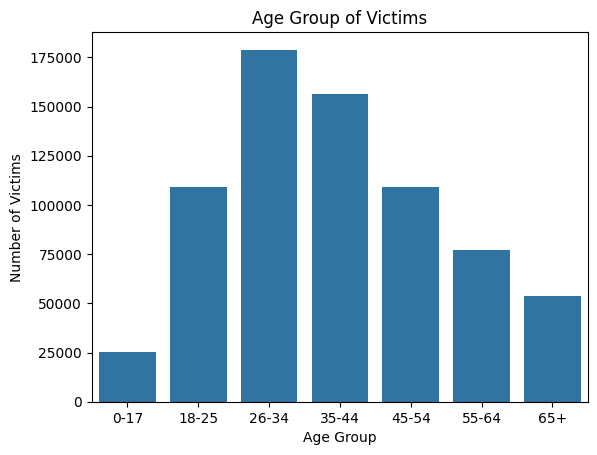

In [11]:
#plot the age group of the victims

sns.countplot(data = data, x="Vict Age Group")
plt.title("Age Group of Victims")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.show()

In [12]:
# victims descent
#update the descent code with the actual descent name
data['Vict Descent'] = data['Vict Descent'].replace(['A', 'B', 'C', 'D', 'F', 'G', 'H', "I", 'J', 'K', 'L', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z'], ['Other Asian', 'Black', 'Chinese', 'Cambodian', 'Filipino', 'Guamanian', \
    'Hispanic/Latin/Mexican', 'American Indian/Alaskan Native', 'Japanese', 'Korean', 'Laotian', 'Other', 'Pacific Islander', \
        'Samoan', 'Hawaiian', 'Vietnamese', 'White', 'Unknown', 'Asian Indian'])

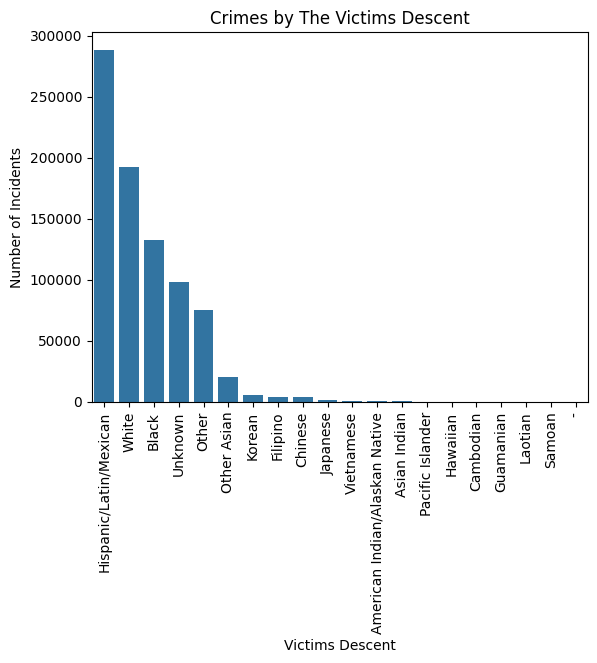

In [13]:
sns.countplot(data=data, x="Vict Descent", order = data['Vict Descent'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crimes by The Victims Descent')
plt.xlabel('Victim''s Descent')
plt.ylabel('Number of Incidents')
plt.show()

In [19]:
# Convert 'Date Rptd' to datetime format
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')

# Extract only the date part
data['Date Rptd'] = data['Date Rptd'].dt.date

# Check the first few rows to confirm the changes
print(data[['Date Rptd']].head())

    Date Rptd
0  2020-03-01
1  2020-02-09
2  2020-11-11
3  2023-05-10
4  2022-08-18


In [20]:
data['Date Rptd'].describe()

count         955339
unique          1637
top       2023-02-03
freq             925
Name: Date Rptd, dtype: object

In [24]:
# Convert back to datetime to extract the year
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['Year'] = data['Date Rptd'].dt.year

data['Date Rptd']

0        2020-03-01
1        2020-02-09
2        2020-11-11
3        2023-05-10
4        2022-08-18
            ...    
955334   2024-01-14
955335   2024-02-20
955336   2024-01-16
955337   2024-01-15
955338   2024-04-24
Name: Date Rptd, Length: 955339, dtype: datetime64[ns]

In [26]:
crimes_per_year = data.groupby("Year").size()

In [29]:
crimes_per_year.values

array([192708, 208283, 235065, 234648,  84635], dtype=int64)

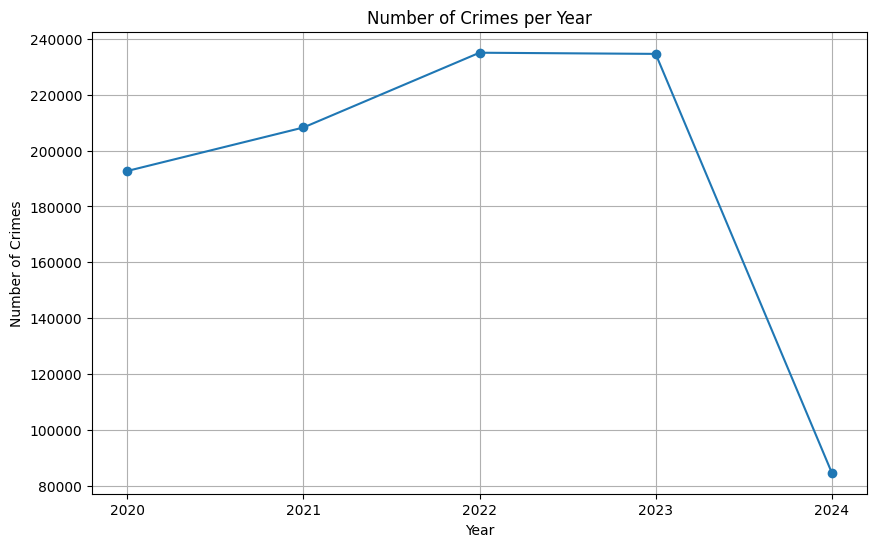

In [27]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(crimes_per_year.index, crimes_per_year.values, marker='o')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(crimes_per_year.index)  # Ensure all years are displayed on the x-axis
plt.show()